In [2]:
# Importing necessary libraries
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Specify the file path of the CSV file containing the e-commerce sales data
data = "/Users/Rihannat/OneDrive/Documents/ecommerce_sales_analysis.csv"
# Read the CSV file into a DataFrame using Pandas
df = pd.read_csv(data)
# `df` now contains the e-commerce data, which can be used for analysis and manipulation
df

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Product_996,Home & Kitchen,50.33,3.6,494,488,359,137,787,678,970,282,155,57,575,634,393
996,997,Product_997,Home & Kitchen,459.07,4.8,701,18,906,129,78,19,110,403,683,104,858,729,474
997,998,Product_998,Sports,72.73,1.3,287,725,109,193,657,215,337,664,476,265,344,888,654
998,999,Product_999,Sports,475.37,1.2,720,196,191,315,622,854,122,65,938,521,268,60,394


In [5]:
# Display the data types of each column in the DataFrame `df`
df.dtypes

product_id          int64
product_name       object
category           object
price             float64
review_score      float64
review_count        int64
sales_month_1       int64
sales_month_2       int64
sales_month_3       int64
sales_month_4       int64
sales_month_5       int64
sales_month_6       int64
sales_month_7       int64
sales_month_8       int64
sales_month_9       int64
sales_month_10      int64
sales_month_11      int64
sales_month_12      int64
dtype: object

In [8]:
# Retrieve the unique values in the 'category' column of the DataFrame `df`
df['category'].unique()

array(['Clothing', 'Home & Kitchen', 'Toys', 'Books', 'Electronics',
       'Health', 'Sports'], dtype=object)

In [9]:
df.columns

Index(['product_id', 'product_name', 'category', 'price', 'review_score',
       'review_count', 'sales_month_1', 'sales_month_2', 'sales_month_3',
       'sales_month_4', 'sales_month_5', 'sales_month_6', 'sales_month_7',
       'sales_month_8', 'sales_month_9', 'sales_month_10', 'sales_month_11',
       'sales_month_12'],
      dtype='object')

In [10]:
# Rename columns in the DataFrame `df` for better readability and to match month names.
df = df.rename(columns = {'sales_month_1':'Jan','sales_month_2':'feb','sales_month_3':'mar','sales_month_4':'apr','sales_month_5':'may',
                          'sales_month_6':'jun','sales_month_7':'jul','sales_month_8':'aug','sales_month_9':'sept','sales_month_10':'oct',
                          'sales_month_11':'nov','sales_month_12':'dec'})
df.columns

Index(['product_id', 'product_name', 'category', 'price', 'review_score',
       'review_count', 'Jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug',
       'sept', 'oct', 'nov', 'dec'],
      dtype='object')

In [16]:
# Count the number of missing (null) values in each column of the DataFrame
df.isnull().sum()

product_id      0
product_name    0
category        0
price           0
review_score    0
review_count    0
Jan             0
feb             0
mar             0
apr             0
may             0
jun             0
jul             0
aug             0
sept            0
oct             0
nov             0
dec             0
dtype: int64

In [11]:
# Count the number of Duplatcate values in each column of the DataFrame
df.duplicated().sum()

0

In [12]:
# Generate descriptive statistics for numerical columns in the DataFrame
# This includes count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 
# 75th percentile, and maximum values for each numerical column
df.describe()

,product_id,price,review_score,review_count,Jan,feb,mar,apr,may,jun,jul,aug,sept,oct,nov,dec
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,247.677130,3.027600,526.506000,498.306000,507.661000,506.739000,503.823000,487.194000,491.653000,507.011000,504.569000,491.934000,514.798000,505.83800,500.386000
std,288.819436,144.607983,1.171243,282.269932,289.941478,285.992689,294.010873,286.645567,287.844324,289.234018,291.047287,289.945691,287.514731,288.710119,288.82451,278.509459
min,1.000000,7.290000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,0.00000,4.000000
25%,250.750000,121.810000,2.000000,283.750000,245.500000,262.500000,243.750000,261.500000,221.000000,236.000000,254.000000,240.500000,247.250000,267.000000,251.25000,259.000000
50%,500.500000,250.920000,3.100000,543.000000,507.500000,508.000000,493.000000,501.500000,497.000000,479.500000,522.500000,499.500000,495.500000,532.000000,502.00000,500.500000
75%,750.250000,373.435000,4.000000,772.000000,740.750000,756.250000,777.250000,749.500000,727.000000,740.500000,757.250000,762.250000,735.250000,770.250000,761.00000,730.000000
max,1000.000000,499.860000,5.000000,999.000000,1000.000000,1000.000000,999.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000


In [33]:
# Calculate the total sales by summing the values across columns 6 to 17 (0-indexed) for each row
# and assign the result to a new column named 'total sales'
df['total sales'] = df.iloc[:,6:18].sum(axis =1)

df.head()

,product_id,product_name,category,price,review_score,review_count,Jan,feb,mar,apr,may,jun,jul,aug,sept,oct,nov,dec,total sales,Revenue
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306,6421,1222558.40
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353,6027,2866441.20
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392,5580,2049757.20
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203,5022,1513329.48
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257,6094,501109.62


In [14]:
# Group the DataFrame by 'category' and calculate the total sales for each category,
# then reset the index to obtain a clean DataFrame
category_sales = df.groupby('category')['total sales'].sum().reset_index()

# Sort the resulting DataFrame by the 'total sales' column in descending order
sorted = category_sales.sort_values(by='total sales', ascending=False)

sorted

,category,total sales
0,Books,938229
6,Toys,917101
5,Sports,916371
2,Electronics,845120
3,Health,834414
1,Clothing,826536
4,Home & Kitchen,742141


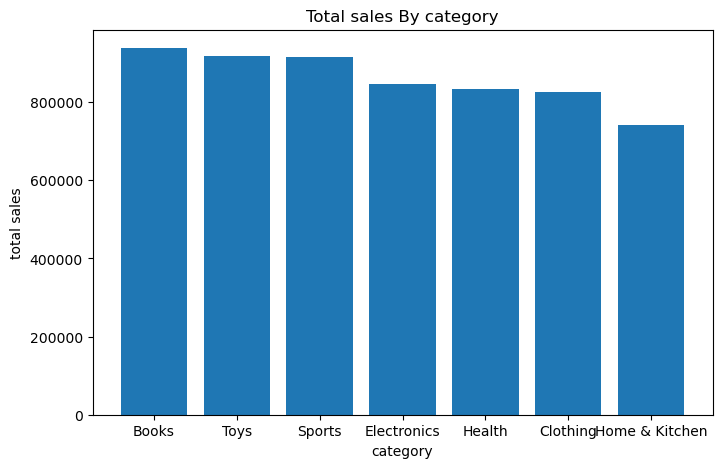

In [29]:
# Set the figure size for the plot
plt.figure(figsize = (8,5))

# Create a bar chart with categories on the x-axis and total sales on the y-axis
plt.bar(sorted['category'],height=sorted['total sales'])

# Label the x-axis and y-axis as 'category','total sales'
plt.xlabel("category")
plt.ylabel("total sales")

# Set the title of the plot
plt.title("Total sales By category")

# Display the plot
plt.show()

In [16]:
# Group the DataFrame by 'category' and sum all numeric columns to get total sales for each category
# Then, select the columns corresponding to each month from January to December
monthly_sales = df.groupby('category').sum(numeric_only=True).loc[:, 'Jan':'dec']

monthly_sales

,Jan,feb,mar,apr,may,jun,jul,aug,sept,oct,nov,dec
category,,,,,,,,,,,,
Books,77932,80079,76998,74699,79051,76644,79114,78108,77211,83504,76557,78332
Clothing,60966,67911,76796,70088,61643,63123,66105,74422,72675,68806,71683,72318
Electronics,76347,72472,70708,73158,72169,70060,72223,65754,69914,70148,68148,64019
Health,67644,67432,67602,72925,69178,63926,75256,69126,64581,72613,72500,71631
Home & Kitchen,57844,57252,62667,65388,59766,63169,60129,65042,58135,64876,66281,61592
Sports,77737,82244,75109,74287,73467,75641,77082,73912,79209,80187,74270,73226
Toys,79836,80271,76859,73278,71920,79090,77102,78205,70209,74664,76399,79268


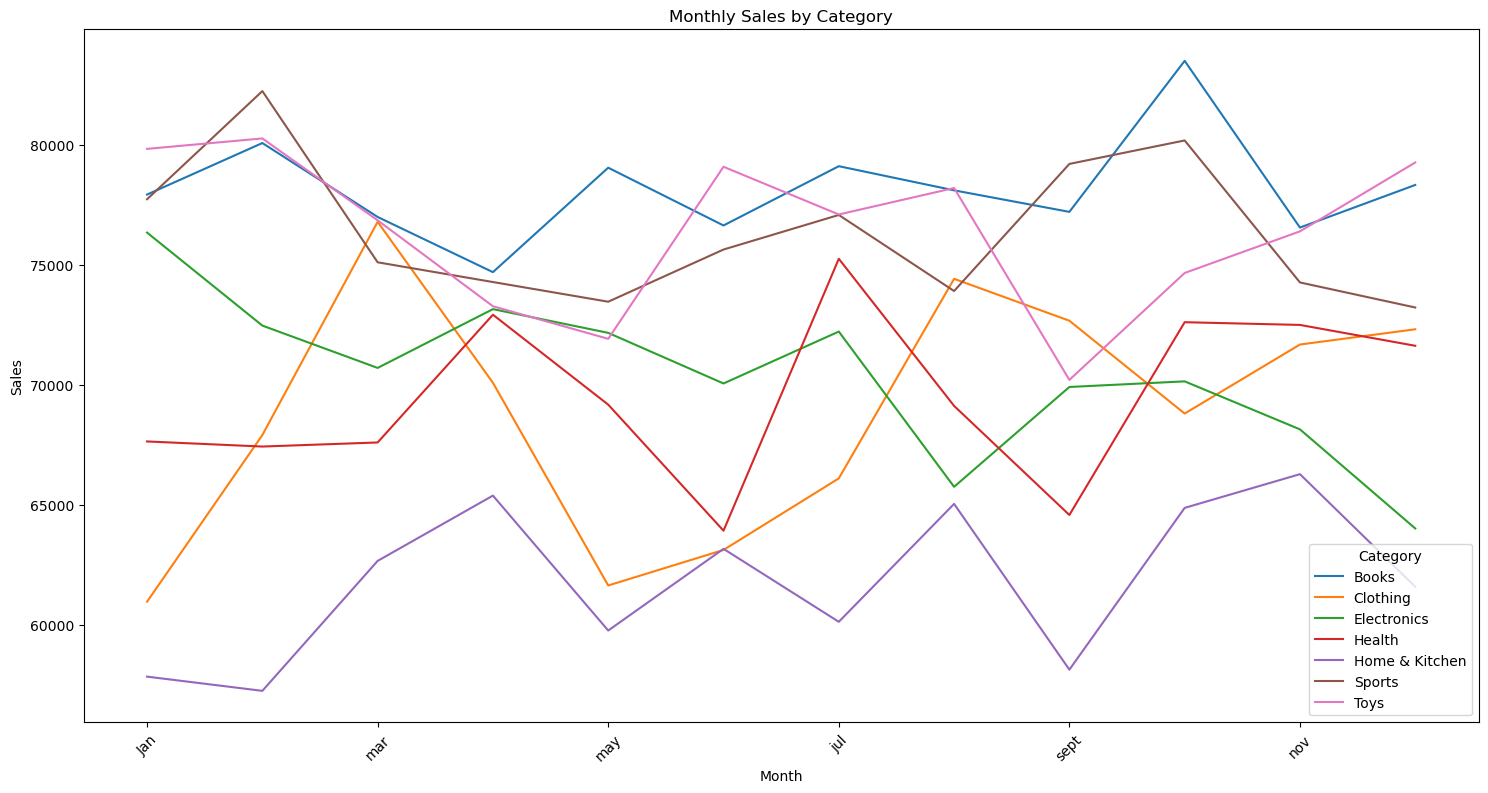

In [13]:
# Transpose the monthly_sales DataFrame to have months as rows and categories as columns
monthly_sales.T.plot(kind='line', figsize=(18, 9))

# Set the title of the line plot
plt.title("Monthly Sales by Category")

# Label the x-axis and y-axis as 'Month','Sales'
plt.xlabel("Month")
plt.ylabel("Sales")

# Add a legend with the title 'Category' to differentiate the lines for each category
plt.legend(title="Category")

# Rotate the x-tick labels for better readability
plt.xticks(rotation=45)
plt.show()

In [17]:
# Calculate the total revenue for each product by multiplying the 'price' by 'total sales'
df['Revenue'] = df['price'] * df['total sales']

# Sort the DataFrame by the 'Revenue' column in descending order to identify the top products
Top_product = df.sort_values(by='Revenue',ascending=False)

# Select the top 10 products with the highest revenue
Top_product_= Top_product.head(10)

Top_product_

,product_id,product_name,category,price,review_score,review_count,Jan,feb,mar,apr,may,jun,jul,aug,sept,oct,nov,dec,total sales,Revenue
305,306,Product_306,Books,488.05,4.5,943,539,963,932,809,502,335,433,402,616,981,674,625,7811,3812158.55
531,532,Product_532,Books,499.86,3.4,162,667,48,734,711,658,950,989,438,588,615,829,303,7530,3763945.80
52,53,Product_53,Sports,470.05,4.8,313,193,97,734,961,798,842,765,913,953,746,885,33,7920,3722796.00
228,229,Product_229,Electronics,446.56,4.9,758,905,720,607,789,849,949,270,745,722,72,756,898,8282,3698409.92
390,391,Product_391,Books,495.30,1.9,507,527,234,510,1000,918,948,681,784,656,177,444,491,7370,3650361.00
522,523,Product_523,Toys,485.11,2.4,772,619,715,959,382,846,997,596,873,22,471,501,370,7351,3566043.61
140,141,Product_141,Books,481.41,4.3,376,159,799,236,453,537,667,816,559,791,579,888,890,7374,3549917.34
112,113,Product_113,Clothing,465.20,1.9,435,564,946,876,922,731,719,364,228,838,695,156,528,7567,3520168.40
751,752,Product_752,Health,470.22,1.9,118,247,858,503,849,928,518,392,378,32,955,873,951,7484,3519126.48
475,476,Product_476,Toys,496.52,3.7,325,558,628,738,978,439,803,30,920,177,643,591,576,7081,3515858.12


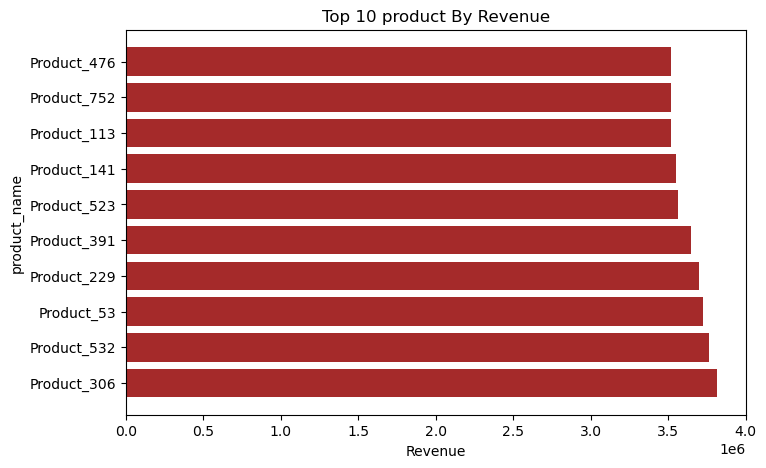

In [28]:
# Set the figure size for the plot
plt.figure(figsize = (8,5))

# Create a horizontal bar chart with product names on the y-axis and revenue on the x-axis
plt.barh(Top_product_['product_name'],Top_product_['Revenue'],color = 'Brown')

# Label the x-axis and y-axis as 'Revenue','Product_name'
plt.xlabel("Revenue")
plt.ylabel("product_name")

# Set the title of the plot
plt.title("Top 10 product By Revenue")
plt.show()

In [19]:
# Group the DataFrame by 'category' and calculate the mean of the 'review_score' for each category
# Then reset the index to obtain a clean DataFrame
Average_review = df.groupby('category')['review_score'].mean().reset_index()

Average_review

,category,review_score
0,Books,3.096753
1,Clothing,2.952143
2,Electronics,3.143478
3,Health,3.005036
4,Home & Kitchen,3.035200
5,Sports,3.091503
6,Toys,2.870861


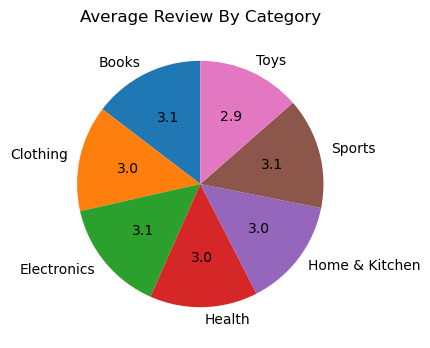

In [27]:
# Set the figure size for the pie chart
plt.figure(figsize=(4, 4))

# Create a pie chart with average review scores for each category
plt.pie(
    Average_review['review_score'], labels=Average_review['category'], # Labels for each slice of the pie
     startangle=90,autopct=lambda p: f'{p * sum(Average_review["review_score"]) / 100:.1f}')  # Start the pie chart at a 90-degree angle

# Set the title of the pie chart
plt.title('Average Review By Category')

plt.show()

In [21]:
# Group the DataFrame by 'category' and sum the 'review_count' for each category
Top_review_count = df.groupby('category')['review_count'].sum().reset_index()

# Sort the resulting DataFrame by 'review_count' in descending order to identify categories with the most reviews
Top_review_count_= Top_review_count.sort_values(by='review_count',ascending = False)

Top_review_count_

,category,review_count
5,Sports,83726
0,Books,79263
6,Toys,79175
2,Electronics,73862
3,Health,72398
1,Clothing,70347
4,Home & Kitchen,67735


<function matplotlib.pyplot.show(close=None, block=None)>

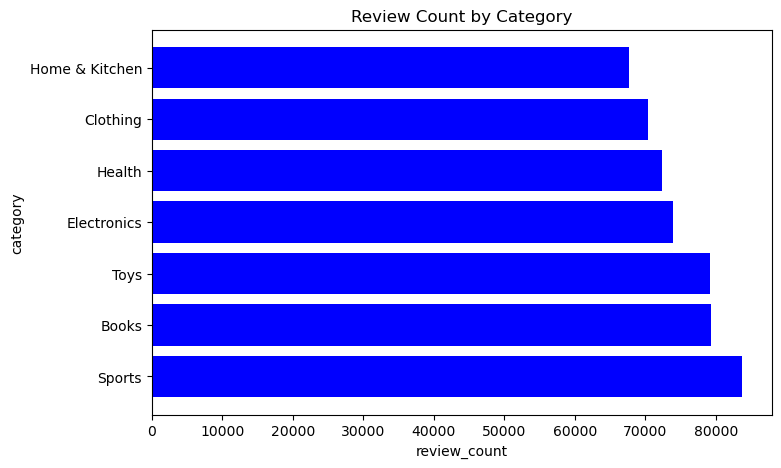

In [26]:
# Set the figure size for the horizontal bar chart
plt.figure(figsize = (8,5))

# Create a horizontal bar chart with categories on the y-axis and review counts on the x-axis
plt.barh(Top_review_count_['category'],Top_review_count_['review_count'], color = 'Blue')

plt.xlabel('review_count')
plt.ylabel('category')

plt.title('Review Count by Category')
plt.show

In [23]:
# Calculate the correlation coefficient between 'price' and 'review_score' columns in the DataFrame
correlation_df = df['price'].corr(df['review_score'])

correlation_df

0.02895978542431917

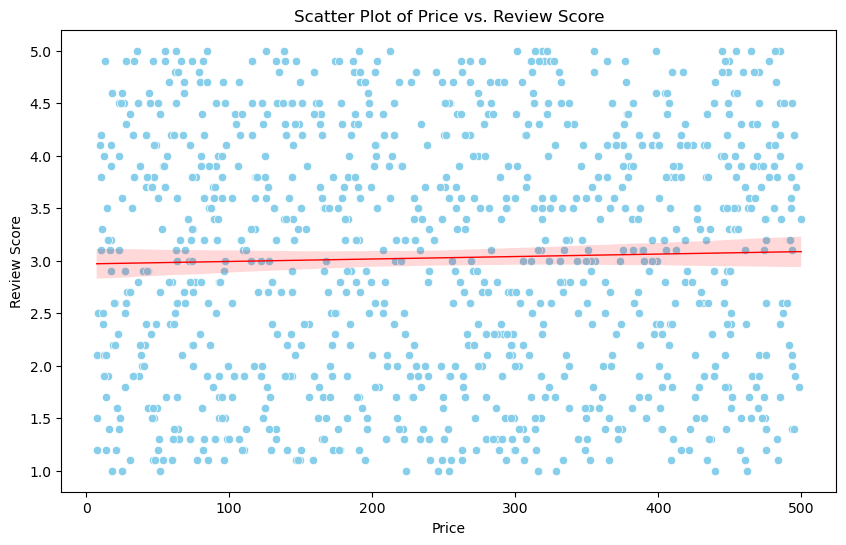

In [25]:
# Set the figure size for the scatter plot
plt.figure(figsize=(10, 6))

# Create a scatter plot with 'price' on the x-axis and 'review_score' on the y-axis
sns.scatterplot(x='price', y='review_score', data=df, color='skyblue')

# Add a regression line to the scatter plot, without displaying the scatter points again
sns.regplot(x='price', y='review_score', data=df, scatter=False, color='red', line_kws={"linewidth":1})

plt.title("Scatter Plot of Price vs. Review Score")
plt.xlabel("Price")
plt.ylabel("Review Score")
plt.show()
